# 1 最开始做的
这部分可以不看，刚开始敲得，准确率低，代码能力比较弱，嘤嘤嘤。

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

data = pd.read_csv("cwurData1.csv")


In [3]:
# 进行数据预处理
# 给空数据填值，填上2012、2013年的值。
import numpy as np
board_2012 = data[(data["year"] == 2012)][["institution", "broad_impact"]]
board_2013 = data[(data["year"] == 2013)][["institution", "broad_impact"]]
board_2014_2015 = data[(data["year"].isin([2014, 2015]))][["institution", "broad_impact"]]

for index1, row1 in board_2012.iterrows():
    if pd.isnull(row1["broad_impact"]):
        for index2, row2 in board_2014_2015.iterrows():
            if row2["institution"] == row1["institution"]:
                board_2012.at[index1,"broad_impact"] = row2["broad_impact"]
                break
            else:
                pass
        if pd.isnull(board_2012.at[index1,"broad_impact"]):
            median_value = np.median(board_2012["broad_impact"].dropna())
            board_2012.at[index1,"broad_impact"] = median_value

for index1, row1 in board_2013.iterrows():
    if pd.isnull(row1["broad_impact"]):
        for index2, row2 in board_2014_2015.iterrows():
            if row2["institution"] == row1["institution"]:
                board_2013.at[index1,"broad_impact"] = row2["broad_impact"]
                break
            else:
                pass
        if pd.isnull(board_2013.at[index1,"broad_impact"]):
            median_value = np.median(board_2013["broad_impact"].dropna())
            board_2013.at[index1,"broad_impact"] = median_value
data.update(board_2012)
data.update(board_2013)

In [4]:
score = data["score"]
data1 = data[["quality_of_education","alumni_employment","quality_of_faculty","publications","influence","citations","broad_impact","patents"]]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data1, score, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


ridge_model = Ridge(alpha=1)  # 可调整 alpha 参数
ridge_model.fit(X_train, y_train)

# 假设你有一个名为 X_test 的测试数据集，包含特征
# 使用岭回归模型进行预测
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

res = np.hstack((y_pred,y_test))
display(r2)

0.4540402322211452

# 2 数据预处理

In [6]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("cwurData1.csv")
# 处理空值数据
board_2012 = data[(data["year"] == 2012)][["institution", "broad_impact"]]
board_2013 = data[(data["year"] == 2013)][["institution", "broad_impact"]]
board_2014_2015 = data[(data["year"].isin([2014, 2015]))][["institution", "broad_impact"]]

for index1, row1 in board_2012.iterrows():
    if pd.isnull(row1["broad_impact"]):
        for index2, row2 in board_2014_2015.iterrows():
            if row2["institution"] == row1["institution"]:
                board_2012.at[index1,"broad_impact"] = row2["broad_impact"]
                break
            else:
                pass
        if pd.isnull(board_2012.at[index1,"broad_impact"]):
            median_value = np.median(board_2012["broad_impact"].dropna())
            board_2012.at[index1,"broad_impact"] = median_value

for index1, row1 in board_2013.iterrows():
    if pd.isnull(row1["broad_impact"]):
        for index2, row2 in board_2014_2015.iterrows():
            if row2["institution"] == row1["institution"]:
                board_2013.at[index1,"broad_impact"] = row2["broad_impact"]
                break
            else:
                pass
        if pd.isnull(board_2013.at[index1,"broad_impact"]):
            median_value = np.median(board_2013["broad_impact"].dropna())
            board_2013.at[index1,"broad_impact"] = median_value
data.update(board_2012)
data.update(board_2013)
data.head()


,world_rank,institution,region,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,24.0,18,85.21,2012


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']

score = data["score"]
features = data[['quality_of_faculty', 'publications', 'citations', 'alumni_employment','influence', 'quality_of_education', 'broad_impact', 'patents']]

x = features.values
y = score.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


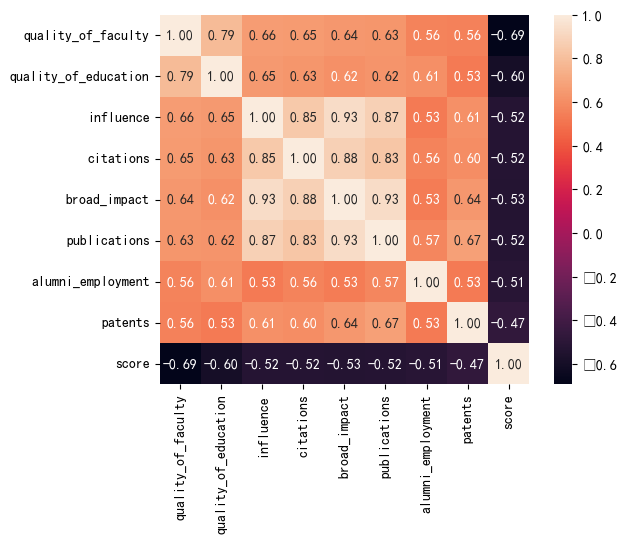

In [8]:
# 观察变量之间的关系
# 主要是计算变量之间的线性关系，相关系数，皮尔逊系数
corrs = data[['quality_of_faculty', 'publications', 'citations', 'alumni_employment','influence', 'quality_of_education', 'broad_impact', 'patents',"score"]].corr()

# 从相关系数矩阵 corrs 中选择了与 'quality_of_faculty' 变量相关性最高的前 9 个变量，并获取它们的列名。
cols = corrs.nlargest(9,"quality_of_faculty")['quality_of_faculty'].index
cm = np.corrcoef(data[cols].values.T)

hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size":10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()


# 3使用线性回归预测得分

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

line1 = LinearRegression()
line1.fit(x_train,y_train)

y_pred = line1.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(rmse)
print(r2)
print(line1.coef_)

6.062507041517643
0.5242305139015173
[-3.50585305  0.34820841  0.05744021 -1.02184516  0.42170002 -0.38606471
 -1.41763572 -0.40082597]


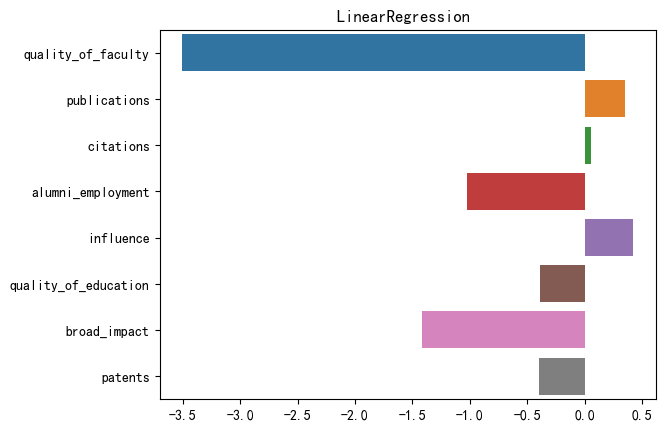

In [11]:
#  观察模型系数 画条形图展示
# x 是模型的参数， y
sns.barplot(x=line1.coef_, y=['quality_of_faculty', 'publications', 'citations', 'alumni_employment','influence', 'quality_of_education', 'broad_impact', 'patents'])
plt.title("LinearRegression ")
plt.rcParams['axes.unicode_minus'] = False
plt.show()


In [14]:
from sklearn.linear_model import Lasso


lasso1 = Lasso(alpha=1)
lasso1.fit(x_train,y_train)
y_lao_pred = lasso1.predict(x_test)
la_rmse = mean_squared_error(y_test,y_lao_pred,squared=False)
lao_r2 = r2_score(y_test,y_lao_pred)
print(la_rmse)
print(lao_r2)

6.407601693598727
0.4685246976674987


In [16]:
from sklearn.linear_model import Ridge

ridge1 = Ridge(alpha=1)
ridge1.fit(x_train,y_train)
y_lin_pred = ridge1.predict(x_test)
lin_rmse = mean_squared_error(y_test,y_lin_pred,squared=False)
lin_r2 = r2_score(y_test,y_lin_pred)
print(lin_rmse)
print(r2)

6.063214490232219
0.5242305139015173


# 4 提高精度

In [94]:
features = data[['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents', 'region']]
places = features["region"].unique()

for place in places:
    idxs = features[features["region"]==place].index
    avg = np.mean(score.loc[idxs])
    if avg > 50 :
        tmp = 1
    elif avg > 45:
        tmp = 2  
    else:
        tmp = 3
 
    
    features = features.replace(place,tmp)
display(features.head(15))

x_train1, x_test1, y_train1, y_test1 = train_test_split(features, score, test_size=0.3, shuffle=True)
x_train1 = scaler.fit_transform(x_train1)
x_test1  =scaler.fit_transform(x_test1)


,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents,region
0,1,1,1,9,1,7,1.0,5,1
1,3,12,4,17,4,9,2.0,1,1
2,5,4,2,11,2,17,4.0,15,1
3,4,16,11,24,16,10,13.0,50,2
4,7,37,22,29,22,2,24.0,18,1
5,2,53,26,14,33,8,41.0,101,1
6,9,15,19,28,13,13,12.0,26,2
7,12,14,15,31,6,14,19.0,66,1
8,10,13,14,21,12,23,13.0,5,1
9,6,6,3,52,5,16,7.0,16,1


In [95]:
line2 = LinearRegression()
lasso2 = Lasso(alpha=1)
ridge2 = Ridge(alpha=1)

line2.fit(x_train1,y_train1)
lasso2.fit(x_train1,y_train1)
ridge2.fit(x_train1,y_train1)

lin2_pred = line2.predict(x_test1)
lasso2_pred = lasso2.predict(x_test1)
ridge2_pred = ridge2.predict(x_test1)

line2_rmse = mean_squared_error(y_test1,lin2_pred,squared=False)
line2_r2 = r2_score(y_test1,lin2_pred)

lasso2_rmse = mean_squared_error(y_test1,lasso2_pred,squared=False)
lasso_r2 = r2_score(y_test1,lasso2_pred)

ridge2_rmse = mean_squared_error(y_test1,ridge2_pred,squared=False)
ridge2_r2 = r2_score(y_test1,ridge2_pred)

print("------ line ------")
print(line2_rmse)
print(line2_r2)
print("-------lasso --------")
print(lasso2_rmse)
print(lasso_r2)
print("--------- ridge ------")
print(ridge2_rmse)
print(ridge2_r2)

------ line ------
4.986640851737833
0.5433247669141961
-------lasso --------
5.087845899481954
0.5246000016444884
--------- ridge ------
4.986456775995352
0.5433584815062685


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

def calVIF(features):
    #添加常数列的意义是为了计算 VIF（方差膨胀因子）。
    # VIF 是用于评估自变量之间共线性程度的指标。
    # 通常，在计算 VIF 时，需要将特征矩阵添加一个常数列，以便拟合一个包含截距的线性回归模型。添加常数列后，VIF 的计算会考虑截距项。
    features = add_constant(features)

    vif = pd.DataFrame()

    vif["features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values,idx) for idx in range(features.shape[1])]
    print(vif)
calVIF(features)

               features        VIF
0                 const  14.111863
1    quality_of_faculty   3.042048
2          publications  10.076348
3             citations   4.802554
4     alumni_employment   1.891969
5             influence   8.252407
6  quality_of_education   3.086553
7          broad_impact  15.242493
8               patents   2.038997
9                region   1.691741


In [247]:
# 阈值设置为10
drop_data = features.drop(columns=[ 'broad_impact', 'publications'])

calVIF(drop_data)

x_train2, x_test2, y_train2, y_test2 = train_test_split(drop_data, score, test_size=0.3, shuffle=True)
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.fit_transform(x_test2)


line2.fit(x_train2,y_train2)
lasso2.fit(x_train2,y_train2)
ridge2.fit(x_train2,y_train2)

lin2_pred = line2.predict(x_test2)
lasso2_pred = lasso2.predict(x_test2)
ridge2_pred = ridge2.predict(x_test2)

line2_rmse = mean_squared_error(y_test2,lin2_pred,squared=False)
line2_r2 = r2_score(y_test2,lin2_pred)

lasso2_rmse = mean_squared_error(y_test2,lasso2_pred,squared=False)
lasso_r2 = r2_score(y_test2,lasso2_pred)

ridge2_rmse = mean_squared_error(y_test2,ridge2_pred,squared=False)
ridge2_r2 = r2_score(y_test2,ridge2_pred)

print("------ line ------")
print(line2_rmse)
print(line2_r2)
print("-------lasso --------")
print(lasso2_rmse)
print(lasso_r2)
print("--------- ridge ------")
print(ridge2_rmse)
print(ridge2_r2)
 

               features        VIF
0                 const  13.581113
1    quality_of_faculty   3.041690
2             citations   3.892509
3     alumni_employment   1.823623
4             influence   4.174677
5  quality_of_education   3.072823
6               patents   1.842416
7                region   1.392715
------ line ------
4.858928372892254
0.5051567529916083
-------lasso --------
4.829505022080995
0.5111316763889303
--------- ridge ------
4.858693844150307
0.5052045216164693


In [254]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
reduced = pca.fit_transform(features)
print(reduced.shape)

x_train3, x_test3, y_train3, y_test3 = train_test_split(reduced, score, test_size=0.3, shuffle=True)

x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.fit_transform(x_test3)

line2.fit(x_train3,y_train3)
lasso2.fit(x_train3,y_train3)
ridge2.fit(x_train3,y_train3)

lin2_pred = line2.predict(x_test3)
lasso2_pred = lasso2.predict(x_test3)
ridge2_pred = ridge2.predict(x_test3)

line2_rmse = mean_squared_error(y_test3,lin2_pred,squared=False)
line2_r2 = r2_score(y_test3,lin2_pred)

lasso2_rmse = mean_squared_error(y_test3,lasso2_pred,squared=False)
lasso_r2 = r2_score(y_test3,lasso2_pred)

ridge2_rmse = mean_squared_error(y_test3,ridge2_pred,squared=False)
ridge2_r2 = r2_score(y_test3,ridge2_pred)

print("------ line ------")
print(line2_rmse)
print(line2_r2)
print("-------lasso --------")
print(lasso2_rmse)
print(lasso_r2)
print("--------- ridge ------")
print(ridge2_rmse)
print(ridge2_r2)

(2200, 6)
------ line ------
4.8823157878149175
0.45271279262238207
-------lasso --------
5.0973879270658635
0.40343339763507935
--------- ridge ------
4.881904035006545
0.4528051002698318


In [204]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
reduced1 = tsne.fit_transform(features)
print(reduced1.shape)

x_train3, x_test3, y_train3, y_test3 = train_test_split(reduced1, score, test_size=0.3, shuffle=True)
x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.fit_transform(x_test3)

line2.fit(x_train3,y_train3)
lasso2.fit(x_train3,y_train3)
ridge2.fit(x_train3,y_train3)

lin2_pred = line2.predict(x_test3)
lasso2_pred = lasso2.predict(x_test3)
ridge2_pred = ridge2.predict(x_test3)

line2_rmse = mean_squared_error(y_test3,lin2_pred,squared=False)
line2_r2 = r2_score(y_test3,lin2_pred)

lasso2_rmse = mean_squared_error(y_test3,lasso2_pred,squared=False)
lasso_r2 = r2_score(y_test3,lasso2_pred)

ridge2_rmse = mean_squared_error(y_test3,ridge2_pred,squared=False)
ridge2_r2 = r2_score(y_test3,ridge2_pred)

print("------ line ------")
print(line2_rmse)
print(line2_r2)
print("-------lasso --------")
print(lasso2_rmse)
print(lasso_r2)
print("--------- ridge ------")
print(ridge2_rmse)
print(ridge2_r2)

(2200, 3)
------ line ------
5.40119117608683
0.4063413232576394
-------lasso --------
5.394184776092356
0.407880506830378
--------- ridge ------
5.401189889212409
0.40634160614489523


,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents,region
0,1,1,1,9,1,7,1.0,5,1
1,3,12,4,17,4,9,2.0,1,1
2,5,4,2,11,2,17,4.0,15,1
3,4,16,11,24,16,10,13.0,50,2
4,7,37,22,29,22,2,24.0,18,1
